The objective of this notebook is to prepare the Capstone 2 heart failure dataset for machine learning. Relevant preprocessing steps include scaling and splitting the data into training and test sets.

In [ ]:
# import relevant libraries and packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [5]:
#Check dtypes
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [6]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Categorical variables (for example, diabetic and not diabetic) have already been converted to binary values.

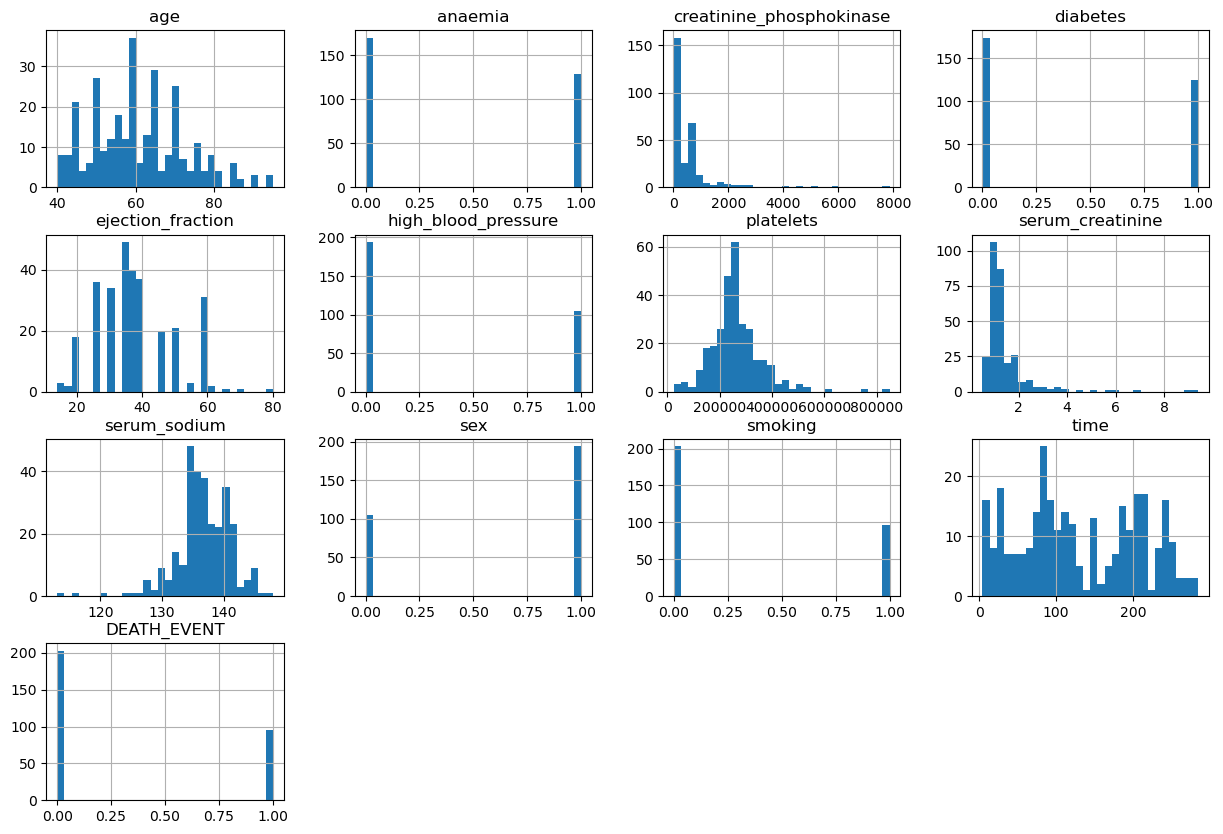

In [7]:
#Next, review histograms of the columns to check variable distribution.
df.hist(bins=30, figsize=(15, 10));

Variables differ in magnitude and should have a scaler applied. Boolean/binary features do not require scaling. However, we will split the data prior to scaling to prevent data leakage.

A 70/30 train/test split will result in 209 records in the training set and 98 in the test set. We need to arrange the data into the features (X) and the value we wish to predict (y, 'DEATH_EVENT').

# Perform test train split

In [8]:
# Create X (features only)
X = df.drop(columns = 'DEATH_EVENT', axis = 1)

In [9]:
# Create y (variable to predict)
y = df['DEATH_EVENT']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

In [11]:
# Check size of training and test sets
X_train.shape, X_test.shape

((209, 12), (90, 12))

In [12]:
y_train.shape, y_test.shape

((209,), (90,))

In [13]:
y_train.describe()

count    209.000000
mean       0.291866
std        0.455713
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: DEATH_EVENT, dtype: float64

In [14]:
y_test.describe()

count    90.000000
mean      0.388889
std       0.490229
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: DEATH_EVENT, dtype: float64

In the training set, 30% of the population died, while in the test set, 39% died. 

Time to isolate and scale all non Boolean features.

# Separate binary and non-binary features
    Non-binary: X_train_to_scale and X_test_to_scale
    Binary: X_train_other and X_test_other

In [15]:
X_train.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'],
      dtype='object')

In [16]:
#Separate the features
X_train_to_scale = X_train[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium', 'time']]

In [22]:
X_test_to_scale = X_test[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium', 'time']]

In [37]:
X_train_other = X_train[['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']]

In [38]:
X_test_other = X_test[['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']]

In [23]:
X_train_to_scale

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
189,40.0,244,45,275000.00,0.90,140,174
34,65.0,94,50,188000.00,1.00,140,29
45,50.0,582,38,310000.00,1.90,135,35
102,80.0,898,25,149000.00,1.10,144,87
219,55.0,582,35,371000.00,0.70,140,197
...,...,...,...,...,...,...,...
23,53.0,63,60,368000.00,0.80,135,22
179,55.0,835,40,279000.00,0.70,140,147
72,85.0,5882,35,243000.00,1.00,132,72
264,61.0,582,38,147000.00,1.20,141,237


In [24]:
#Take a look at the index values
X_train_to_scale.index.unique()

Index([189,  34,  45, 102, 219, 121, 107, 297,   1, 231,
       ...
       173,  71, 263, 208,  59,  23, 179,  72, 264, 135],
      dtype='int64', length=209)

In [35]:
#Get the expected index values for the test set too
X_test_to_scale.index.unique()

Index([212,  40, 128, 180,   5, 226, 145,  63, 122, 197, 268, 234,  64, 247,
        39,  10, 241, 254, 246,  55, 272, 172,  42,  35,  32, 166, 131, 138,
       252,  92,  69, 132, 127,  74, 182, 192, 164, 277,  25, 196, 133,  60,
        13, 210,  16,  15,  43, 183,   8, 201,  96,  83,   0,  20,  14, 202,
        68,   3,  19, 148, 281, 119,  47,  58, 191,   9, 204, 285,  22,  62,
       239, 108,  33, 165,  26, 261, 215, 203, 295, 130, 294, 176,  82, 115,
       284, 139, 230, 253,  81,  76],
      dtype='int64')

In [34]:
X_train_to_scale.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209 entries, 189 to 135
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       209 non-null    float64
 1   creatinine_phosphokinase  209 non-null    int64  
 2   ejection_fraction         209 non-null    int64  
 3   platelets                 209 non-null    float64
 4   serum_creatinine          209 non-null    float64
 5   serum_sodium              209 non-null    int64  
 6   time                      209 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 21.2 KB


# Scale the non-binary features with StandardScaler

In [26]:
# Use StandardScaler() to transform the non-binary features. This will change the df into an array and drop the index
scaler = StandardScaler()
scaler.fit(X_train_to_scale)
X_tr_scaled = scaler.transform(X_train_to_scale)
X_te_scaled = scaler.transform(X_test_to_scale)

In [28]:
#Change the array back to DataFrame; restore column names and index
X_tr_scaled_df = pd.DataFrame(X_tr_scaled, index = X_train_to_scale.index, columns = X_train_to_scale.columns)

In [29]:
X_te_scaled_df = pd.DataFrame(X_te_scaled, index = X_test_to_scale.index, columns = X_test_to_scale.columns)

In [30]:
X_tr_scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209 entries, 189 to 135
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       209 non-null    float64
 1   creatinine_phosphokinase  209 non-null    float64
 2   ejection_fraction         209 non-null    float64
 3   platelets                 209 non-null    float64
 4   serum_creatinine          209 non-null    float64
 5   serum_sodium              209 non-null    float64
 6   time                      209 non-null    float64
dtypes: float64(7)
memory usage: 21.2 KB


In [31]:
X_tr_scaled_df.index.unique()

Index([189,  34,  45, 102, 219, 121, 107, 297,   1, 231,
       ...
       173,  71, 263, 208,  59,  23, 179,  72, 264, 135],
      dtype='int64', length=209)

Great, looks like the index matches the expected values.

In [53]:
#Check that the dataframe looks as expected -- did it scale?
X_tr_scaled_df.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,-1.733590,-0.370687,0.624243,0.102121,-0.471101,0.700065,0.499511
1,0.427538,-0.520704,1.057400,-0.752545,-0.367589,0.700065,-1.415197
2,-0.869139,-0.032650,0.017824,0.445953,0.564014,-0.386960,-1.335968
3,1.724214,0.283386,-1.108384,-1.135672,-0.264078,1.569686,-0.649314
4,-0.436913,-0.032650,-0.242070,1.045202,-0.678124,0.700065,0.803223


In [32]:
X_te_scaled_df.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
212,1.551324,-0.390689,1.057400,2.125815,0.046456,0.265255,0.737199
40,0.859763,-0.032650,-1.541540,-0.012246,0.491556,-0.604366,-1.388787
128,0.081757,-0.366687,-0.675227,0.023531,-0.678124,-0.169555,-0.424831
180,-1.733590,-0.136661,-0.675227,0.377187,-0.471101,-0.169555,0.156184
5,2.588665,-0.567709,0.191086,-0.595365,0.771036,-1.039176,-1.692500


In [36]:
#Check if the test set index values match the expected values
X_te_scaled_df.index.unique()

Index([212,  40, 128, 180,   5, 226, 145,  63, 122, 197, 268, 234,  64, 247,
        39,  10, 241, 254, 246,  55, 272, 172,  42,  35,  32, 166, 131, 138,
       252,  92,  69, 132, 127,  74, 182, 192, 164, 277,  25, 196, 133,  60,
        13, 210,  16,  15,  43, 183,   8, 201,  96,  83,   0,  20,  14, 202,
        68,   3,  19, 148, 281, 119,  47,  58, 191,   9, 204, 285,  22,  62,
       239, 108,  33, 165,  26, 261, 215, 203, 295, 130, 294, 176,  82, 115,
       284, 139, 230, 253,  81,  76],
      dtype='int64')

X_train and X_test non-Boolean features are now scaled and need to be recombined with the Boolean features.

# Recombine the scaled and non-scaled dataframes, check them, and export

In [39]:
X_train_other

,anaemia,diabetes,high_blood_pressure,sex,smoking
189,0,0,1,0,0
34,0,1,1,1,0
45,0,1,0,1,1
102,0,0,0,1,1
219,0,1,1,0,0
...,...,...,...,...,...
23,0,1,0,1,0
179,0,0,0,1,1
72,0,0,0,1,1
264,0,1,0,1,0


In [40]:
X_train_other.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209 entries, 189 to 135
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   anaemia              209 non-null    int64
 1   diabetes             209 non-null    int64
 2   high_blood_pressure  209 non-null    int64
 3   sex                  209 non-null    int64
 4   smoking              209 non-null    int64
dtypes: int64(5)
memory usage: 17.9 KB


In [41]:
#Double check that X_train_other index matches X_tr_scaled_df
X_train_other.index.unique()

Index([189,  34,  45, 102, 219, 121, 107, 297,   1, 231,
       ...
       173,  71, 263, 208,  59,  23, 179,  72, 264, 135],
      dtype='int64', length=209)

In [45]:
#Join the scaled training data with the unscaled binary features; join is index-on-index by default
X_tr_final = X_tr_scaled_df.join(X_train_other, how = 'outer')

In [46]:
X_tr_final

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia,diabetes,high_blood_pressure,sex,smoking
189,-1.733590,-0.370687,0.624243,0.102121,-0.471101,0.700065,0.499511,0,0,1,0,0
34,0.427538,-0.520704,1.057400,-0.752545,-0.367589,0.700065,-1.415197,0,1,1,1,0
45,-0.869139,-0.032650,0.017824,0.445953,0.564014,-0.386960,-1.335968,0,1,0,1,1
102,1.724214,0.283386,-1.108384,-1.135672,-0.264078,1.569686,-0.649314,0,0,0,1,1
219,-0.436913,-0.032650,-0.242070,1.045202,-0.678124,0.700065,0.803223,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
23,-0.609803,-0.551707,1.923713,1.015731,-0.574612,-0.386960,-1.507631,0,1,0,1,0
179,-0.436913,0.220379,0.191086,0.141416,-0.678124,0.700065,0.142979,0,0,0,1,1
72,2.156439,5.267941,-0.242070,-0.212239,-0.367589,-1.039176,-0.847387,0,0,0,1,1
264,0.081757,-0.032650,0.017824,-1.155319,-0.160567,0.917471,1.331419,0,1,0,1,0


In [47]:
#Join the scaled test data with the unscaled binary features
X_te_final = X_te_scaled_df.join(X_test_other, how = 'outer')

In [48]:
X_te_final

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia,diabetes,high_blood_pressure,sex,smoking
212,1.551324,-0.390689,1.057400,2.125815,0.046456,0.265255,0.737199,0,0,0,1,1
40,0.859763,-0.032650,-1.541540,-0.012246,0.491556,-0.604366,-1.388787,0,0,1,1,1
128,0.081757,-0.366687,-0.675227,0.023531,-0.678124,-0.169555,-0.424831,0,0,1,1,1
180,-1.733590,-0.136661,-0.675227,0.377187,-0.471101,-0.169555,0.156184,0,1,0,1,0
5,2.588665,-0.567709,0.191086,-0.595365,0.771036,-1.039176,-1.692500,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
139,-0.869139,0.933458,-0.675227,-0.526599,-0.574612,0.265255,-0.372011,0,0,1,1,0
230,-0.004688,-0.448696,-0.675227,-1.990339,0.356991,-2.126202,0.935272,0,0,0,0,0
253,0.859763,-0.526705,-0.242070,-0.281005,-0.160567,-1.039176,1.040911,0,1,1,0,0
81,0.600428,-0.032650,1.057400,-0.012246,-0.181269,0.047850,-0.794568,0,0,0,1,1


In [49]:
#X test and train sets are looking good! Do a final check to make sure no nulls snuck in
X_tr_final.isnull().sum()

age                         0
creatinine_phosphokinase    0
ejection_fraction           0
platelets                   0
serum_creatinine            0
serum_sodium                0
time                        0
anaemia                     0
diabetes                    0
high_blood_pressure         0
sex                         0
smoking                     0
dtype: int64

In [50]:
X_te_final.isnull().sum()

age                         0
creatinine_phosphokinase    0
ejection_fraction           0
platelets                   0
serum_creatinine            0
serum_sodium                0
time                        0
anaemia                     0
diabetes                    0
high_blood_pressure         0
sex                         0
smoking                     0
dtype: int64

In [53]:
#Export the preprocessed datasets to CSV
X_tr_final.to_csv('X_tr.csv')
X_te_final.to_csv('X_te.csv')
y_train.to_csv('y_tr.csv')
y_test.to_csv('y_te.csv')